In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pylab import figure, cm
from matplotlib.colors import LogNorm
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [19]:
gecon = pd.read_excel('Gecon40_post_final.xls') # Required xlutils, `pip3 install xlutils`
gecon.head().T

,0,1,2,3,4
AREA,0,10.4777,33.623,12.1534,36.4603
COUNTRY,Bosnia&Herzegovina,Brazil,Brazil,Brazil,Brazil
D1,0,252.85,639.833,565.792,604.486
D2,0,181.754,109.199,565.792,604.486
D3,0,168.666,109.199,522.757,547.912
D4,0,156.602,109.199,522.757,547.912
DIS_LAKE,NaN,156602,580072,630610,615036
DIS_MAJOR_RIVER,NaN,181754,109199,683544,671246
DIS_OCEAN,NaN,252850,639834,565792,604486
DIS_RIVER,NaN,168666,188349,522757,547912


In [20]:
gecon.describe()['MER2000_40']

count    20690.000000
mean         1.757633
std         15.936517
min          0.000000
25%          0.002132
50%          0.023116
75%          0.268598
max       1453.534683
Name: MER2000_40, dtype: float64

In [22]:
gecon.loc[gecon['MER2000_40'] > 700] # Japan - so productive!

,AREA,COUNTRY,D1,D2,D3,D4,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,...,ROUGH,SOIL_UNIT,TEMP_NEW,TEMPAV_8008,TEMPMAX,TEMPMIN,TEMPSD,TEMPSD80_08,QUALITY_REVISION,DATE OF LAST
20016,7274.488,Japan,22.5054,22.5054,22.5054,22.5054,284438.7,1422801.0,22505.4,1190285.0,...,0.18,181.0,14.73,14.917098,26.04,3.8,7.91,0.590786,3.0,2011-03-14


In [23]:
# removing the most productive part of Japan to make visuals easier
gecon = gecon.loc[gecon['MER2000_40'] < 1000]

# Looking at Environmental Factors

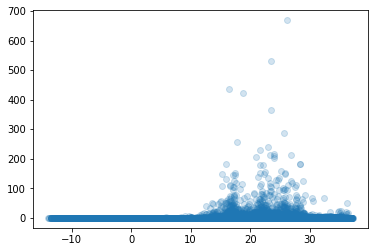

In [24]:
plt.scatter(gecon['TEMPMAX'], gecon['MER2000_40'], alpha=0.2)

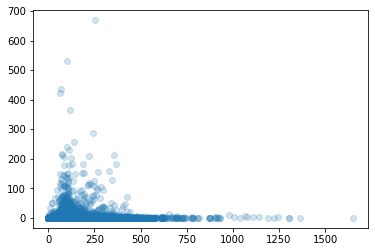

In [25]:
plt.scatter(gecon['PRECMAX'], gecon['MER2000_40'], alpha=0.2)

# Distance to water

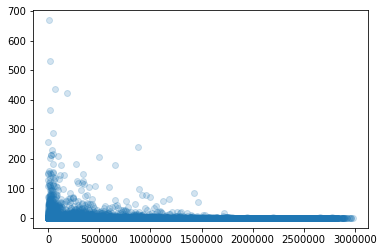

In [26]:
plt.scatter(gecon['DIS_OCEAN'], gecon['MER2000_40'], alpha=0.2)

# Comparing Countries

In [27]:
brazil = gecon.loc[gecon['COUNTRY'] == 'Brazil'];brazil.head()

,AREA,COUNTRY,D1,D2,D3,D4,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,...,ROUGH,SOIL_UNIT,TEMP_NEW,TEMPAV_8008,TEMPMAX,TEMPMIN,TEMPSD,TEMPSD80_08,QUALITY_REVISION,DATE OF LAST
1,10.47769,Brazil,252.8497,181.7542,168.6656,156.6020,156602.0,181754.2,252849.70,168665.6,...,0.05,2.0,17.38,17.860489,24.79,12.02,4.66,0.407419,3.0,2009-06-10
2,33.62301,Brazil,639.8335,109.1993,109.1993,109.1993,580072.4,109199.3,639833.50,188349.1,...,0.05,11.0,21.53,22.075071,26.10,17.02,3.36,0.640499,3.0,2009-06-10
3,12.15342,Brazil,565.7923,565.7923,522.7566,522.7566,630609.5,683543.5,565792.30,522756.6,...,0.05,14.0,26.83,26.655820,25.47,22.98,0.84,0.467277,3.0,2009-06-10
4,36.46025,Brazil,604.4861,604.4861,547.9117,547.9117,615035.5,671245.9,604486.10,547911.6,...,0.04,52.0,26.73,26.757328,25.83,23.15,0.92,0.432021,3.0,2009-06-10
5,0.00000,Brazil,0.2873,0.2873,0.2873,0.2873,522919.3,1508678.0,287.26,66590.9,...,NaN,0.0,25.45,NaN,NaN,NaN,NaN,NaN,3.0,2009-06-10


In [28]:
russia = gecon.loc[gecon['COUNTRY'] == 'Russia'];russia.head()

,AREA,COUNTRY,D1,D2,D3,D4,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,...,ROUGH,SOIL_UNIT,TEMP_NEW,TEMPAV_8008,TEMPMAX,TEMPMIN,TEMPSD,TEMPSD80_08,QUALITY_REVISION,DATE OF LAST
851,3532.41400,Russia,627.1383,359.2641,351.9698,276.0548,276054.8,359264.1,627138.3,351969.8,...,0.0,0.0,12.63,13.031680,25.34,0.93,9.08,0.666241,3.0,2010-08-04
852,9029.44400,Russia,577.3085,256.6300,250.3748,250.3748,311836.3,256630.0,577308.5,250374.8,...,0.0,0.0,12.08,12.559339,25.11,-0.49,9.50,0.712281,3.0,2010-08-04
853,2130.94900,Russia,626.7479,293.4581,285.7334,285.7334,323665.6,293458.1,626747.9,285733.4,...,0.0,0.0,12.18,12.612499,25.31,-0.56,9.61,0.750054,3.0,2010-08-04
854,7602.27200,Russia,595.0787,150.5757,143.9830,143.9830,406550.6,150575.7,595078.7,143983.0,...,0.0,0.0,10.88,11.484842,25.19,-2.29,10.16,0.813489,3.0,2010-08-04
855,35.52464,Russia,628.7070,210.3328,201.7729,201.7729,385846.9,210332.8,628707.0,201772.9,...,0.0,0.0,10.85,11.376005,25.34,-2.25,10.21,0.851758,3.0,2010-08-04


In [32]:
usa = gecon.loc[gecon['COUNTRY'] == 'United States'];usa.head()

,AREA,COUNTRY,D1,D2,D3,D4,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,...,ROUGH,SOIL_UNIT,TEMP_NEW,TEMPAV_8008,TEMPMAX,TEMPMIN,TEMPSD,TEMPSD80_08,QUALITY_REVISION,DATE OF LAST
889,30.560200,United States,542.4929,542.4929,542.4929,542.4929,903015.4,1113820.0,542492.9,816967.2,...,0.24,221.0,19.48,19.573421,27.33,9.25,6.86,0.677632,3.0,2010-09-01
890,1064.312000,United States,486.2409,193.4072,113.3819,11.2175,11217.5,193407.2,486240.9,113381.9,...,0.02,106.0,8.45,8.364296,20.91,-5.63,9.72,1.392251,3.0,2010-09-01
891,1964.315000,United States,800.9407,315.6725,247.1611,18.8221,18822.1,315672.5,800940.8,247161.1,...,0.01,0.0,5.55,5.285991,18.69,-8.88,10.09,1.040317,3.0,2010-09-01
892,8.730289,United States,318.6485,6.9060,0.1388,0.1388,94852.2,6906.0,318648.5,138.8,...,0.07,21.0,5.08,5.043750,19.80,-11.40,11.31,0.896184,3.0,2010-09-01
893,65.477170,United States,242.8075,52.5021,2.7948,1.7013,1701.3,52502.1,242807.5,2794.8,...,0.03,21.0,5.68,5.990948,20.62,-10.58,11.32,0.810604,3.0,2010-09-01


In [40]:
countries = pd.concat([brazil, russia, usa])

In [41]:
brazil.sum()['MER2000_40']

740.7624039355029

In [43]:
brazil.count()['MER2000_40']

818

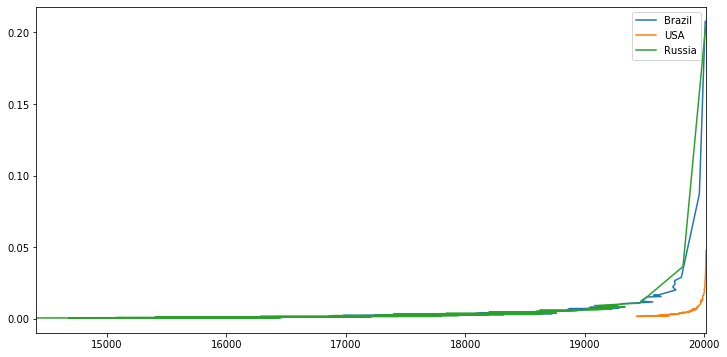

In [66]:
(brazil['MER2000_40']/brazil.sum()['MER2000_40']).sort_values().tail(int(brazil.count()['MER2000_40']/10)).plot(label='Brazil')
(usa['MER2000_40']/usa.sum()['MER2000_40']).sort_values().tail(int(usa.count()['MER2000_40']/10)).plot(label='USA')
(russia['MER2000_40']/russia.sum()['MER2000_40']).sort_values().tail(int(russia.count()['MER2000_40']/10)).plot(label='Russia')
plt.legend()

In [125]:
def plot_country(c, f):
    country = gecon.loc[gecon['COUNTRY'] == c]['MER2000_40']
    total = country.max()
    top_10 = country.sort_values().tail(int(country.count()/f))
    top_10_scaled = top_10/total
    
    ## 'Downsample' to get 100 values for easier comparison
    n = top_10_scaled.shape[0]/100
    top_10_scaled = top_10_scaled.reset_index()
    s = (top_10_scaled.index.to_series() / n).astype(int)
    top_10_scaled = top_10_scaled.groupby(s).mean()

    plt.plot(top_10_scaled['MER2000_40'].tail(80), label = c)
    
for f in [1, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    plot_country('Russia', f)
    plot_country('Brazil', f)
    plot_country('United States', f)
    plot_country('India', f)
    plt.legend()
    plt.title('Top '+ str(100/f) + '% cells')
    plt.savefig('Top ' + str(f) + ' cells.png')
    
    plt.clf()

<Figure size 864x432 with 0 Axes>

No handles with labels found to put in legend.


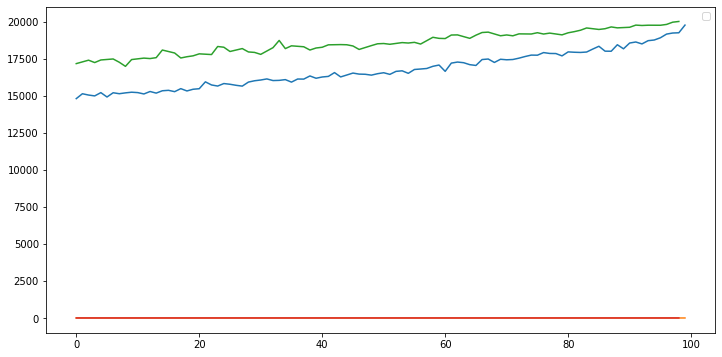

In [106]:
plot_country('Russia')
plot_country('Brazil')
plt.legend()

In [83]:
b = gecon.loc[gecon['COUNTRY'] == 'Brazil']['MER2000_40']
n = b.shape[0]/100
b = b.reset_index()
s = (b.index.to_series() / 5).astype(int)
bs = b.groupby(s).mean()

(818,)

In [95]:
bs.shape

(164, 2)

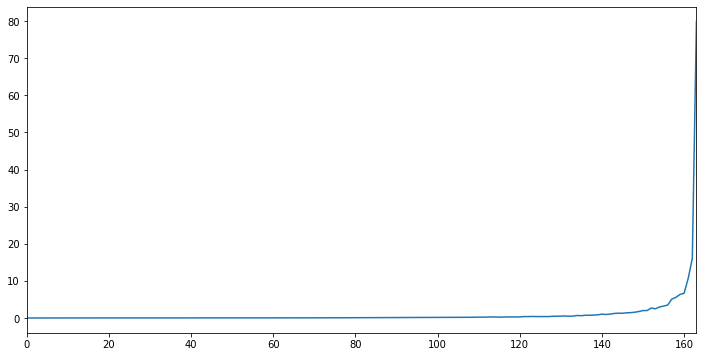

In [98]:
bs['MER2000_40'].plot()